## Euler-Lagrange equation

For a two body system the Lagrangian with generalized coordinates \$x_1$, $y_1$, $x_2$, $y_2$, is

$\begin{align}
  \mathcal{L} = T - U,  
\end{align}$

where T = kinetic:  

$\begin{align}
 T = \frac{1}{2}(m_1)(\dot x_1^2 + \dot y_1^2) + \frac{1}{2}(m_2)(\dot x_2^2 + \dot y_2^2)
  \;.
 \end{align}$

U = potential

$\begin{align}
 U = -(Gm_1m_2)((x_1-x_2)^2+(y_1-y_2)^2)^{-1/2}
 \;.
 \end{align}$

The Euler-Lagrange equations used are

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot x_1} = \frac{\partial\mathcal L}{\partial x_1}
 \quad\Longrightarrow\quad
 m_2 \ddot x_1 = g(m_1m_2)((x_1-x_2)^2+(y_1-y_2)^2)^{-3/2}(x_2-x_1)
  \;.
\end{align}$
$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot y_1} = \frac{\partial\mathcal L}{\partial y_1}
 \quad\Longrightarrow\quad
 m_2 \ddot y_1 = g(m_1m_2)((x_1-x_2)^2+(y_1-y_2)^2)^{-3/2}(y_2-y_1)
  \;.
\end{align}$
$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot x_2} = \frac{\partial\mathcal L}{\partial x_2}
 \quad\Longrightarrow\quad
 m_1 \ddot x_2 = g(m_1m_2)((x_1-x_2)^2+(y_1-y_2)^2)^{-3/2}(x_1-x_2)
  \;.
\end{align}$$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot x_2} = \frac{\partial\mathcal L}{\partial y_2}
 \quad\Longrightarrow\quad
 m_1 \ddot y_2 = g(m_1m_2)((x_1-x_2)^2+(y_1-y_2)^2)^{-3/2}(y_1-y_2)
  \;.
\end{align}$

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint

In [2]:
# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

In [3]:
class twobody():  #written by niko stamos.12 4/30/2020
    """"
    two body class that implements parameters using Lagrange equation for two bodies in cartesian coordinates
    
    Parameters:
    m1 : mass of first body
    m2 : mass of second body
    x1: x coordinate of first body
    y1: y coordinate of first body
    x2: x coordinate of second body
    y2: y coordinate of second body
    
    """
    def __init__(self,m1,m2,G=1.): #initialize parameters, G is gravitational constant,
        # m1 and m2 are masses 1 and 2
        
        self.m1 = m1
        self.m2 = m2
        self.G = G
        
    def diffr(self, p, q , r, s): #function that returns the x and y differnce and raises to -3/2
        ##, p = x1 and q = y1 r = x2 and s = y2     
        return 1/(np.sqrt((p-r)**2 + (q-s)**2))**-3.
    
    def dy_dt(self, t, y):
        
        # makes the vector that stores x1[0], y1[2], x2[4], y2[6] and 
        #their first time derivatives x1dot[1] y1dot[3] x2dot[5] y2dot[7]
        
        return [y[1],(self.G*self.m2)*self.diffr(y[0], y[2], y[4], y[6])*(y[4]-y[0]),\
                #x1dot
                y[3],(self.G*self.m2)*self.diffr(y[0], y[2], y[4], y[6])*(y[6]-y[2]),\
                #y1dot
                y[5],(self.G*self.m1)*self.diffr(y[0], y[2], y[4], y[6])*(y[0]-y[4]),\
                #x2dot
                y[7],(self.G*self.m1)*self.diffr(y[0], y[2], y[4], y[6])*(y[2]-y[6])]
                #y2dot
    
        
    def solve_ode(self,t_pts,x1_0,x1_dot_0,y1_0,y1_dot_0,x2_0,x2_dot_0,y2_0,y2_dot_0,abserr=1.0e-9,relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [x1_0,x1_dot_0,y1_0,y1_dot_0,x2_0,x2_dot_0,y2_0,y2_dot_0] 
        
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), y, t_eval=t_pts, atol=abserr, rtol=relerr)
        
        x1,x1_dot,y1,y1_dot,x2,x2_dot,y2,y2_dot = solution.y
        
        return (x1,x1_dot,y1,y1_dot,x2,x2_dot,y2,y2_dot)

In [4]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [5]:
def start_stop_indices(t_pts, plot_start, plot_stop):   
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [6]:
# Labels for individual plot axes

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 5.  #dont need a long time interval to see the pattern of the orbits
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

m1 = 1.
m2 = 100.  #make mass 2 heavier so that we can have low initial velocities in lines 16-17 of this cell
G = 1.

x1_0, x1_dot_0 = 1., -1.
y1_0, y1_dot_0 = 1., 1.
x2_0, x2_dot_0 = -(m1 / m2) * x1_0, -(m1 / m2) * x1_dot_0
y2_0, y2_dot_0 = -(m1 / m2) * y1_0, -(m1 / m2) * y1_dot_0


# Instantiate a orbit 
orb1 = twobody(m1 = m1, m2 = m2, G = G )

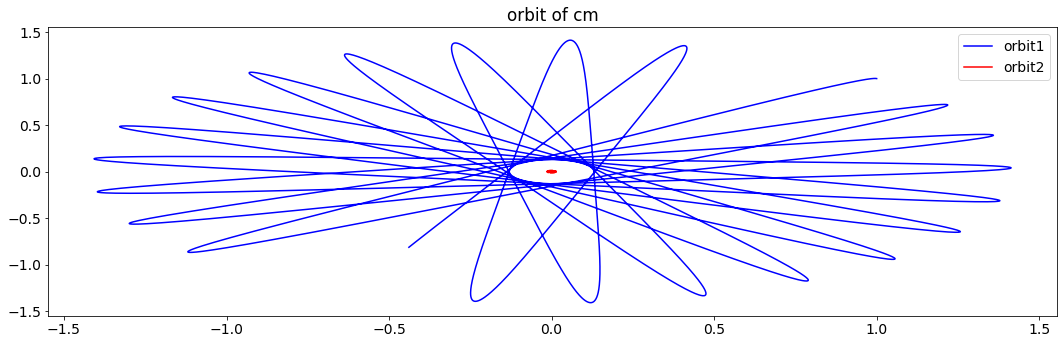

In [7]:
x1,x1_dot,y1,y1_dot,x2,x2_dot,y2,y2_dot = orb1.solve_ode(t_pts,x1_0,x1_dot_0,y1_0,y1_dot_0,x2_0,x2_dot_0,y2_0,y2_dot_0)

# start the plot!
fig = plt.figure(figsize=(15,5))
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,1,1)                  

#start, stop = start_stop_indices(t_pts, t_start, t_end)    

plot_y_vs_x(x1, y1, #orbit of the first mass (lighter mass)
            axis_labels=None, 
            color='blue',
            label='orbit1', 
            title=r'orbit of cm', 
            ax=ax_a)    
plot_y_vs_x(x2, y2, #orbit of the second mass (heavier masss) to simulate being the rest frame
            axis_labels=None, 
            color='red',
            label='orbit2', 
            ax=ax_a)    

fig.tight_layout() 

""""
comments about figure:
the heavier mass does not move very much but the lighter mass moves a lot
the orbit is not close, but the maximum radius is fixed

""""

In [8]:
print(x1)

[ 1.          0.9988529   0.99741197 ... -0.42911716 -0.43405894
 -0.43896667]


In [9]:
print(y1)

[ 1.          1.0008528   1.00141118 ... -0.7861229  -0.79983668
 -0.81348772]


In [10]:
print(x2)

[-0.01       -0.00998853 -0.00997412 ...  0.00429117  0.00434059
  0.00438967]


In [11]:
print(x1_0)

1.0


In [12]:
print(x2_0)

-0.01


In [13]:
print(y1_0)

1.0
